In [1]:
import os
import csv
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.image as img
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Dataset

In [2]:
# Converting all the known Images to grey images
path = 'KnownImages'
myList = os.listdir(path)

for i in myList:
    openedImg = Image.open(f'{path}/{i}')
    studentNames = os.path.splitext(i)[0]
    newName = studentNames + 'grey'
    openedImg = openedImg.resize((64, 64)).convert('L')
    openedImg.save('GreyedImages/' + newName + '.png')

In [3]:
# Encoding thes images array and adding them to the dataset
path = 'GreyedImages'
myList = os.listdir(path)    
images_greyed = []
count = 0 

with open(r'datasets\olivetti_X.csv', 'a', newline='') as f:
    for i in myList:
        count = count + 1
        im = img.imread(f'{path}/{i}')
        image_reshape = (im.flatten().reshape(-1, 1).T)
        writer = csv.writer(f)        
        writer.writerows(image_reshape)
        
        lastRow = pd.read_csv("datasets\olivetti_y.csv").iloc[-1][0]
        data = [str(lastRow+1)]
        with open(r'datasets\olivetti_y.csv', 'a', newline='') as file:
            writer = csv.writer(file)  
            writer.writerow(data)
file.close()
f.close()

In [4]:
# Reading the updated datasets as array
data = np.loadtxt(open("datasets\olivetti_X.csv", "rb"), delimiter=",", skiprows=1)
target = np.loadtxt(open("datasets\olivetti_Y.csv", "rb"), delimiter=",", skiprows=1)
data

array([[0.45454547, 0.47107437, 0.51239669, ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.31818181, 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       [0.19834711, 0.19421488, 0.19421488, ..., 0.75206614, 0.75206614,
        0.73966944],
       ...,
       [0.20392157, 0.40784314, 0.45490196, ..., 0.22352941, 0.21960784,
        0.20784314],
       [0.7529412 , 0.7607843 , 0.7607843 , ..., 0.29411766, 0.3529412 ,
        0.36862746],
       [0.78431374, 0.78431374, 0.78039217, ..., 0.75686276, 0.7607843 ,
        0.7647059 ]])

# Data Anyalysis

In [5]:
X = data
y = target
Height = 64
Width = 64

print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("There are {} input features".format(data.shape[1]))
print("Size of each image is 64 x 64")

There are 423 images in the dataset
There are 64 unique targets in the dataset
There are 4096 input features
Size of each image is 64 x 64


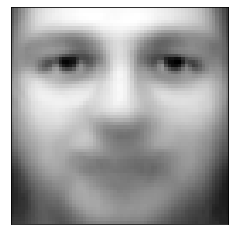

In [6]:
mean_image = np.mean(data,axis=0)
plt.figure
plt.imshow(mean_image.reshape((64,64)), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

In [7]:
def plot_gallery(images, h, w, titles=None, n_row=4, n_col=12):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if titles != None:
            plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

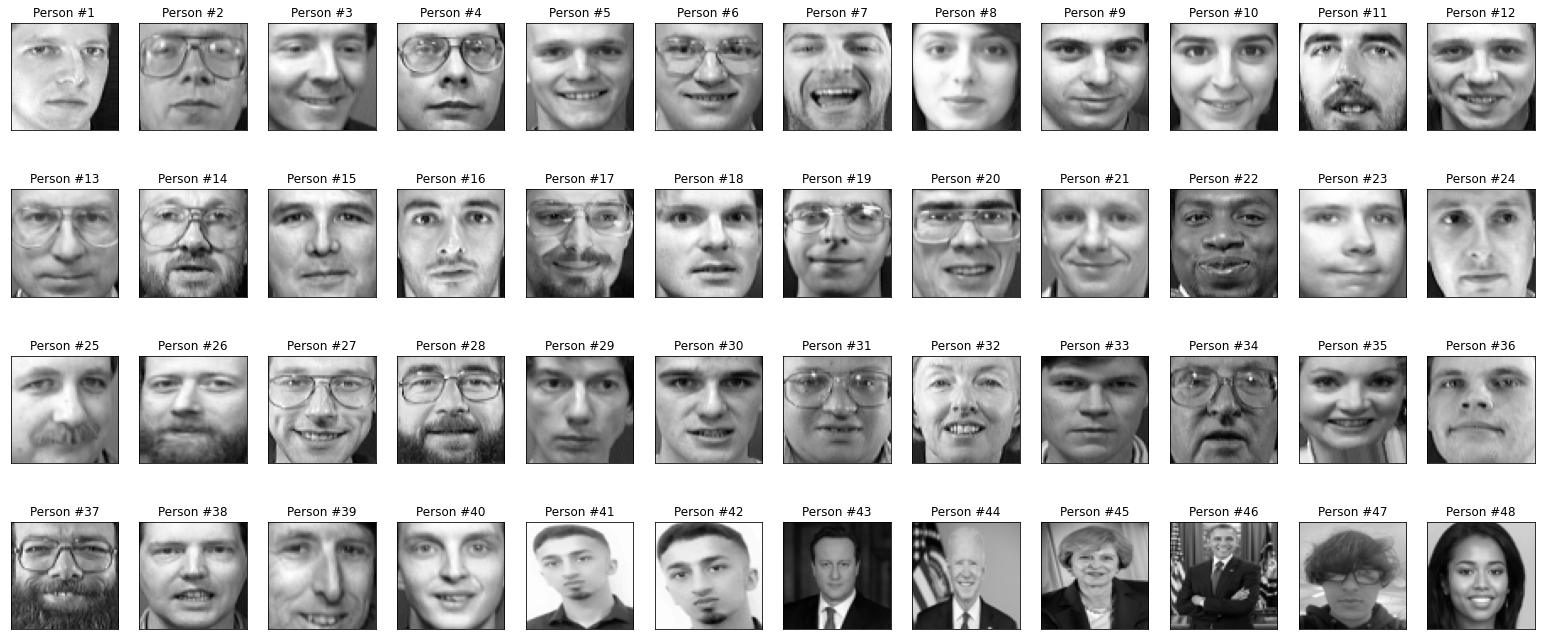

In [8]:
base = 398

Unique_faces = np.array((data[0], data[10]), dtype=float)

    
for i in range(20,400,10):
    Unique_faces = np.concatenate([Unique_faces, [data[i]]])
    
for i in range(1,9):
    Unique_faces = np.concatenate([Unique_faces, [data[base+i]]])
    
Unique_faces

titles = ['Person #'+str(i) for i in range(1,49)]

#print(titles)

plot_gallery(Unique_faces, Height, Width, titles)

# Data Pre-processing 

# Spliting Dataset

In [9]:
# Split into a training set (75%) and a test set (25%) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# PCA

In [10]:
pca = PCA(n_components=150, whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Current shape of input data matrix: ", X_train_pca.shape)

Current shape of input data matrix:  (317, 150)


# KNeighborsClassifier

In [11]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [12]:
accuracy = model.score(X_test_pca,y_test)
print("Testing Score = {:.3f}".format(accuracy))

Testing Score = 0.509


In [13]:
accuracy = model.score(X_train_pca,y_train)
print("Training Score = {:.3f}".format(accuracy))

Training Score = 0.685


# Confusion Matrix

In [14]:
y_test_pred = model.predict(X_test_pca)
cfm = confusion_matrix(y_test,y_test_pred)
cfm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Evaluation Metrics

In [15]:
cReport = classification_report(y_test, y_test_pred)
print(cReport)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.00      0.00      0.00         4
         2.0       1.00      0.25      0.40         4
         3.0       0.00      0.00      0.00         3
         4.0       0.67      1.00      0.80         4
         5.0       0.67      0.67      0.67         3
         6.0       0.00      0.00      0.00         1
         7.0       1.00      0.14      0.25         7
         8.0       0.60      1.00      0.75         3
         9.0       0.33      0.33      0.33         3
        10.0       1.00      1.00      1.00         1
        11.0       1.00      0.50      0.67         2
        12.0       0.00      0.00      0.00         1
        13.0       1.00      1.00      1.00         3
        14.0       0.08      1.00      0.15         2
        15.0       1.00      1.00      1.00         1
        16.0       0.00      0.00      0.00         1
        17.0       0.67    

C:\Users\Danyal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Danyal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Danyal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Resetting Datasets

In [16]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np

# Download Olivetti faces dataset
olivetti = fetch_olivetti_faces()
x = olivetti.images
y = olivetti.target

# Print info on shapes and reshape where necessary
print("Original x shape:", x.shape)
X = x.reshape((400, 4096))
print("New x shape:", X.shape)
print("y shape", y.shape)

# Save the numpy arrays
np.savetxt("datasets\olivetti_X.csv", X, delimiter = ",")
np.savetxt("datasets\olivetti_y.csv", y, delimiter = ",", fmt = '%d')

print("\nDownloading and reshaping done!")

Original x shape: (400, 64, 64)
New x shape: (400, 4096)
y shape (400,)

